# All the results and visualizations for the Sampta Paper

In [1]:
#Import everything
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

## Checking if we have our data run

### Regression

In [2]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/GRAE_Data")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)

File Length: 2712


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Parameter STD
2268,SPUD,EnergyEfficiency,turn,0.3,"{'knn': 18, 'OD_method': 'default', 'agg_metho...","{'42': -0.05834189781927335, '1738': -0.058341...","{'42': 5.086263020833333e-06, '1738': 5.086263...","{'42': 0.65828953041094, '1738': 0.65170889144...","{'42': 0.6227625165881767, '1738': 0.695308186...","{'42': 0.6755661125568726, '1738': 0.725942573...","{'42': 0.5198244501155332, '1738': 0.525094855...","{'42': 0.5962666585067466, '1738': 0.640366179...","{'42': 0.7011456555098131, '1738': 0.696579783...","{'42': 0.6429179248812762, '1738': 0.606174540...","{'42': 0.6214635272768742, '1738': 0.557953262...","{'42': 0.576330138880733, '1738': 0.5291614727...","{'42': {'RF-OOB': 0.5923386321813204, 'KNN_A':...","{'knn': 0.25024513064310483, 'OD_method': 0.02..."
1701,MASH-,iris,turn,0.3,"{'knn': 6, 'page_rank': 'None', 'DTM': 'hellin...","{'42': 0.9733333333333334, '1738': 0.973333333...","{'42': 0.0008444444444444445, '1738': 0.000888...","{'42': 0.9583333333333334, '1738': 0.975, '527...","{'42': 1.0, '1738': 0.9666666666666667, '5271'...","{'42': 0.9666666666666667, '1738': 0.966666666...","{'42': 1.0, '1738': 0.9333333333333333, '5271'...","{'42': 1.0, '1738': 0.9333333333333333, '5271'...","{'42': 1.0, '1738': 0.9333333333333333, '5271'...","{'42': 1.0, '1738': 0.9333333333333333, '5271'...","{'42': 1.0, '1738': 0.9664109121909632, '5271'...","{'42': 0.9664109121909632, '1738': 0.966410912...","{'42': {'RF-OOB': 0.9625, 'KNN_A': 1.0, 'RF_A'...","{'knn': 0.01018378182924592, 'page_rank': 0.0,..."
955,MASH-,hepatitis,turn,0.3,"{'knn': 8, 'page_rank': 'None', 'DTM': 'log', ...","{'42': 0.7898550724637681, '1738': 0.789855072...","{'42': 0.0004988447805082966, '1738': 0.000367...","{'42': 0.7454545454545455, '1738': 0.731818181...","{'42': 0.7142857142857143, '1738': 0.678571428...","{'42': 0.6785714285714286, '1738': 0.714285714...","{'42': 0.75, '1738': 0.6428571428571429, '5271...","{'42': 0.75, '1738': 0.6428571428571429, '5271...","{'42': 0.7549407114624506, '1738': 0.619047619...","{'42': 0.7549407114624506, '1738': 0.619047619...","{'42': 0.7188693659281894, '1738': 0.663265306...","{'42': 0.6816326530612244, '1738': 0.705118411...","{'42': {'RF-OOB': 0.7136363636363636, 'KNN_A':...","{'knn': 0.028175268888522235, 'page_rank': 1.3..."
958,DTA,hepatitis,even,0.3,"{'knn': 11, 'distances': 'DPT'}",{'42': 0.6983240223463687},{'42': 0.2727442963702756},{'42': 0.6713286713286714},{'42': 0.8333333333333334},{'42': 0.5833333333333334},{'42': 0.7222222222222222},{'42': 0.5555555555555556},{'42': 0.7204861111111112},{'42': 0.5382395382395382},{'42': 0.8333333333333334},{'42': 0.578415945449777},"{'42': {'RF-OOB': 0.7317880794701986, 'KNN_A':...",{}
1923,RF-MASH-,diabetes,skewed,0.3,"{'knn': 18, 'page_rank': 'off-diagonal', 'DTM'...",{'42': 0.80078125},{'42': 0.3236931694878472},{'42': 0.7907166123778502},{'42': 0.37662337662337664},{'42': 0.35064935064935066},{'42': 0.4935064935064935},{'42': 0.7207792207792207},{'42': 0.46185064935064934},{'42': 0.7257243306023794},{'42': 0.3033434650455927},{'42': 0.3630495676531482},"{'42': {'RF-OOB': 0.759771986970684, 'KNN_A': ...","{'knn': 0.10757445559790958, 'page_rank': 0.00..."


In [3]:
cls_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
cls_bl['csv_file'] = cls_bl['csv_file'].str.replace('.csv', '')
cls_bl.sample(5)

,csv_file,split,A_Classification_Score,B_Classification_Score
405,diabetes,random,0.714286,0.707792
339,glass,distort,0.767442,0.697674
703,titanic,skewed,0.622378,0.818182
370,hill_valley,random,0.532787,0.581967
134,optdigits,distort,0.981699,0.983007


In [4]:
reg_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
reg_bl['csv_file'] = reg_bl['csv_file'].str.replace('.csv', '')
reg_bl.sample(5)


,csv_file,split,A_Classification_Score,B_Classification_Score
340,ConcreteCompressiveStrength,random,0.370455,0.498235
342,ConcreteCompressiveStrength,turn,0.803740,0.805584
291,OpticalNetwork,even,0.807348,0.867782
339,Automobile,distort,0.703428,0.694896
69,SML2010,distort,0.987614,0.962105


In [5]:
#This helps me to see where my tests have failed
proc_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb A", "Nearest Neighbor A", "Nearest Neighbor (F1 score or RMSE) A", "Random Forest (F1 score or RMSE) A",
                                                      "Random Forest Emb B", "Nearest Neighbor B", "Nearest Neighbor (F1 score or RMSE) B", "Random Forest (F1 score or RMSE) B"]:
    proc_df[columns] = [np.mean(list(d.values())) for d in proc_df[columns].values]

proc_df["Combined_Metric"] = proc_df["CE"] - proc_df["FOSCTTM"]

proc_df = proc_df.merge(pd.concat([cls_bl, reg_bl], ignore_index=True), how = "left")
#proc_df = proc_df.merge(reg_bl, how = "left")

results_df = plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,0.579510,-0.183539,0.900176,0.355952,0.640715,0.769619,0.774758,-0.159360,-0.179408,0.900512,0.845670,NaN,-0.355119,-0.128310,0.500979,0.827033,0.876427
1,hill_valley,0.733117,0.519168,0.734996,0.546205,0.696138,0.691129,0.744248,0.570952,0.544554,0.738520,0.279086,0.643916,0.463854,0.547286,0.729702,0.606557,0.598361
2,CommunityCrime,0.497917,-0.006658,0.793918,0.535578,0.710046,0.712440,0.329513,-0.142984,-0.208392,0.786104,0.740419,NaN,-0.290245,-0.139376,0.535960,0.628443,0.639682
3,heart_disease,0.739134,0.556229,0.779095,0.626263,0.717172,0.717172,0.554121,0.515140,0.577778,0.766037,0.705587,0.663362,0.296210,0.693093,0.676768,0.683333,0.700000
4,Medicaldataset,0.764131,0.555572,0.773290,NaN,0.752287,0.755764,0.659481,NaN,NaN,0.787405,NaN,0.679432,0.158345,0.516046,0.958302,0.647727,0.810606
5,Automobile,0.757670,0.246401,0.882649,0.715318,0.767879,0.821432,0.817108,0.343892,0.025612,0.881048,0.804208,NaN,-0.139808,0.795496,0.856611,0.862563,0.839518
6,audiology,0.717747,0.526252,0.864377,0.714571,0.775679,0.753457,0.725285,0.504321,0.321053,0.861876,0.805604,0.672867,0.111884,0.805357,0.749474,0.763158,0.763158
7,heart_failure,0.774903,0.699666,0.826655,0.749164,0.779698,0.770797,0.720613,0.658863,0.745819,0.830920,0.773136,0.724074,0.422953,0.727162,0.890970,0.816667,0.833333
8,ConcreteSlumpTest,0.513335,0.447216,0.890893,0.623485,0.780732,0.751162,0.669869,0.123935,-0.034983,0.816872,0.875523,NaN,-0.171756,0.852770,0.766478,0.781249,0.840009
9,hepatitis,0.784776,0.671014,0.803720,0.760870,0.780923,0.789388,0.653340,0.695652,0.569544,0.778977,0.758580,0.761269,0.289319,0.755093,0.814493,0.678571,0.750000


In [6]:
# Filter proc_df to create classification and regression dataframes
classification_df = proc_df[proc_df['csv_file'].isin(cls_bl['csv_file'].unique())]
regression_df = proc_df[proc_df['csv_file'].isin(reg_bl['csv_file'].unique())]

# Visualizations

In [7]:
results_df.columns

Index(['csv_file', 'SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'],
      dtype='object')

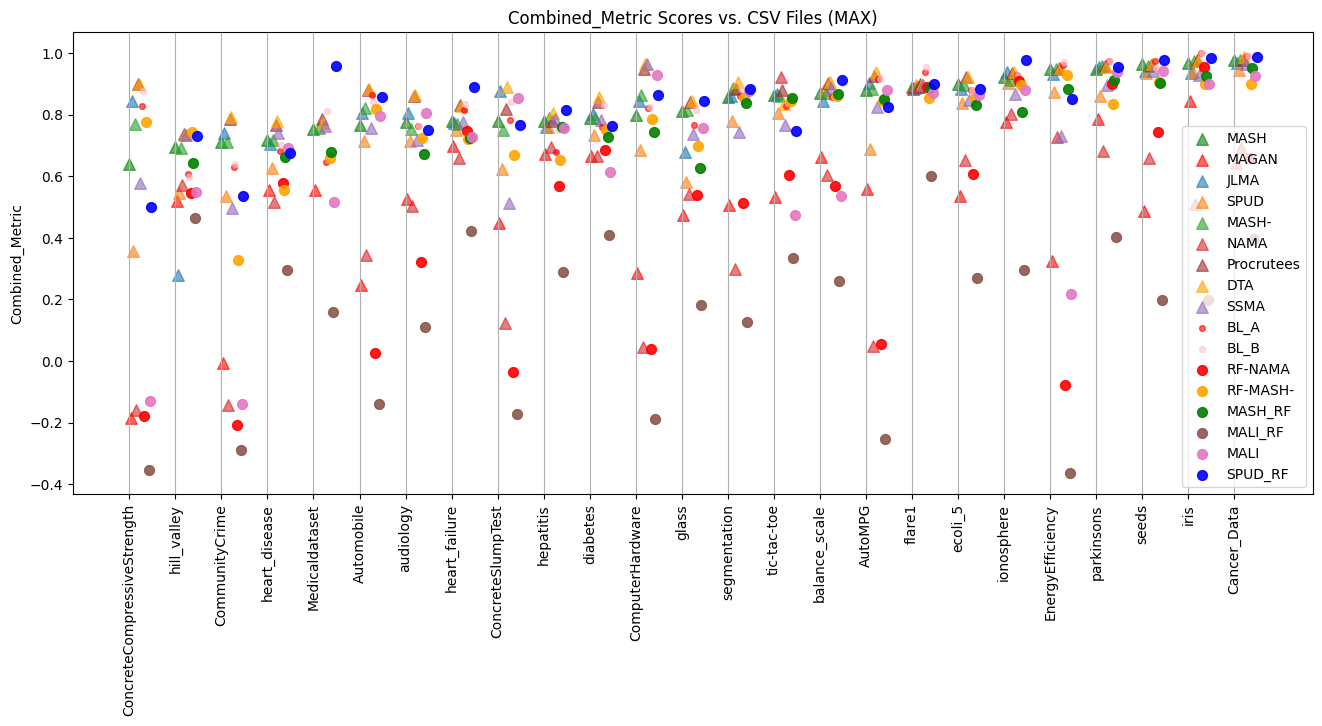

In [8]:
plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=False, plot_methods= ['SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'])

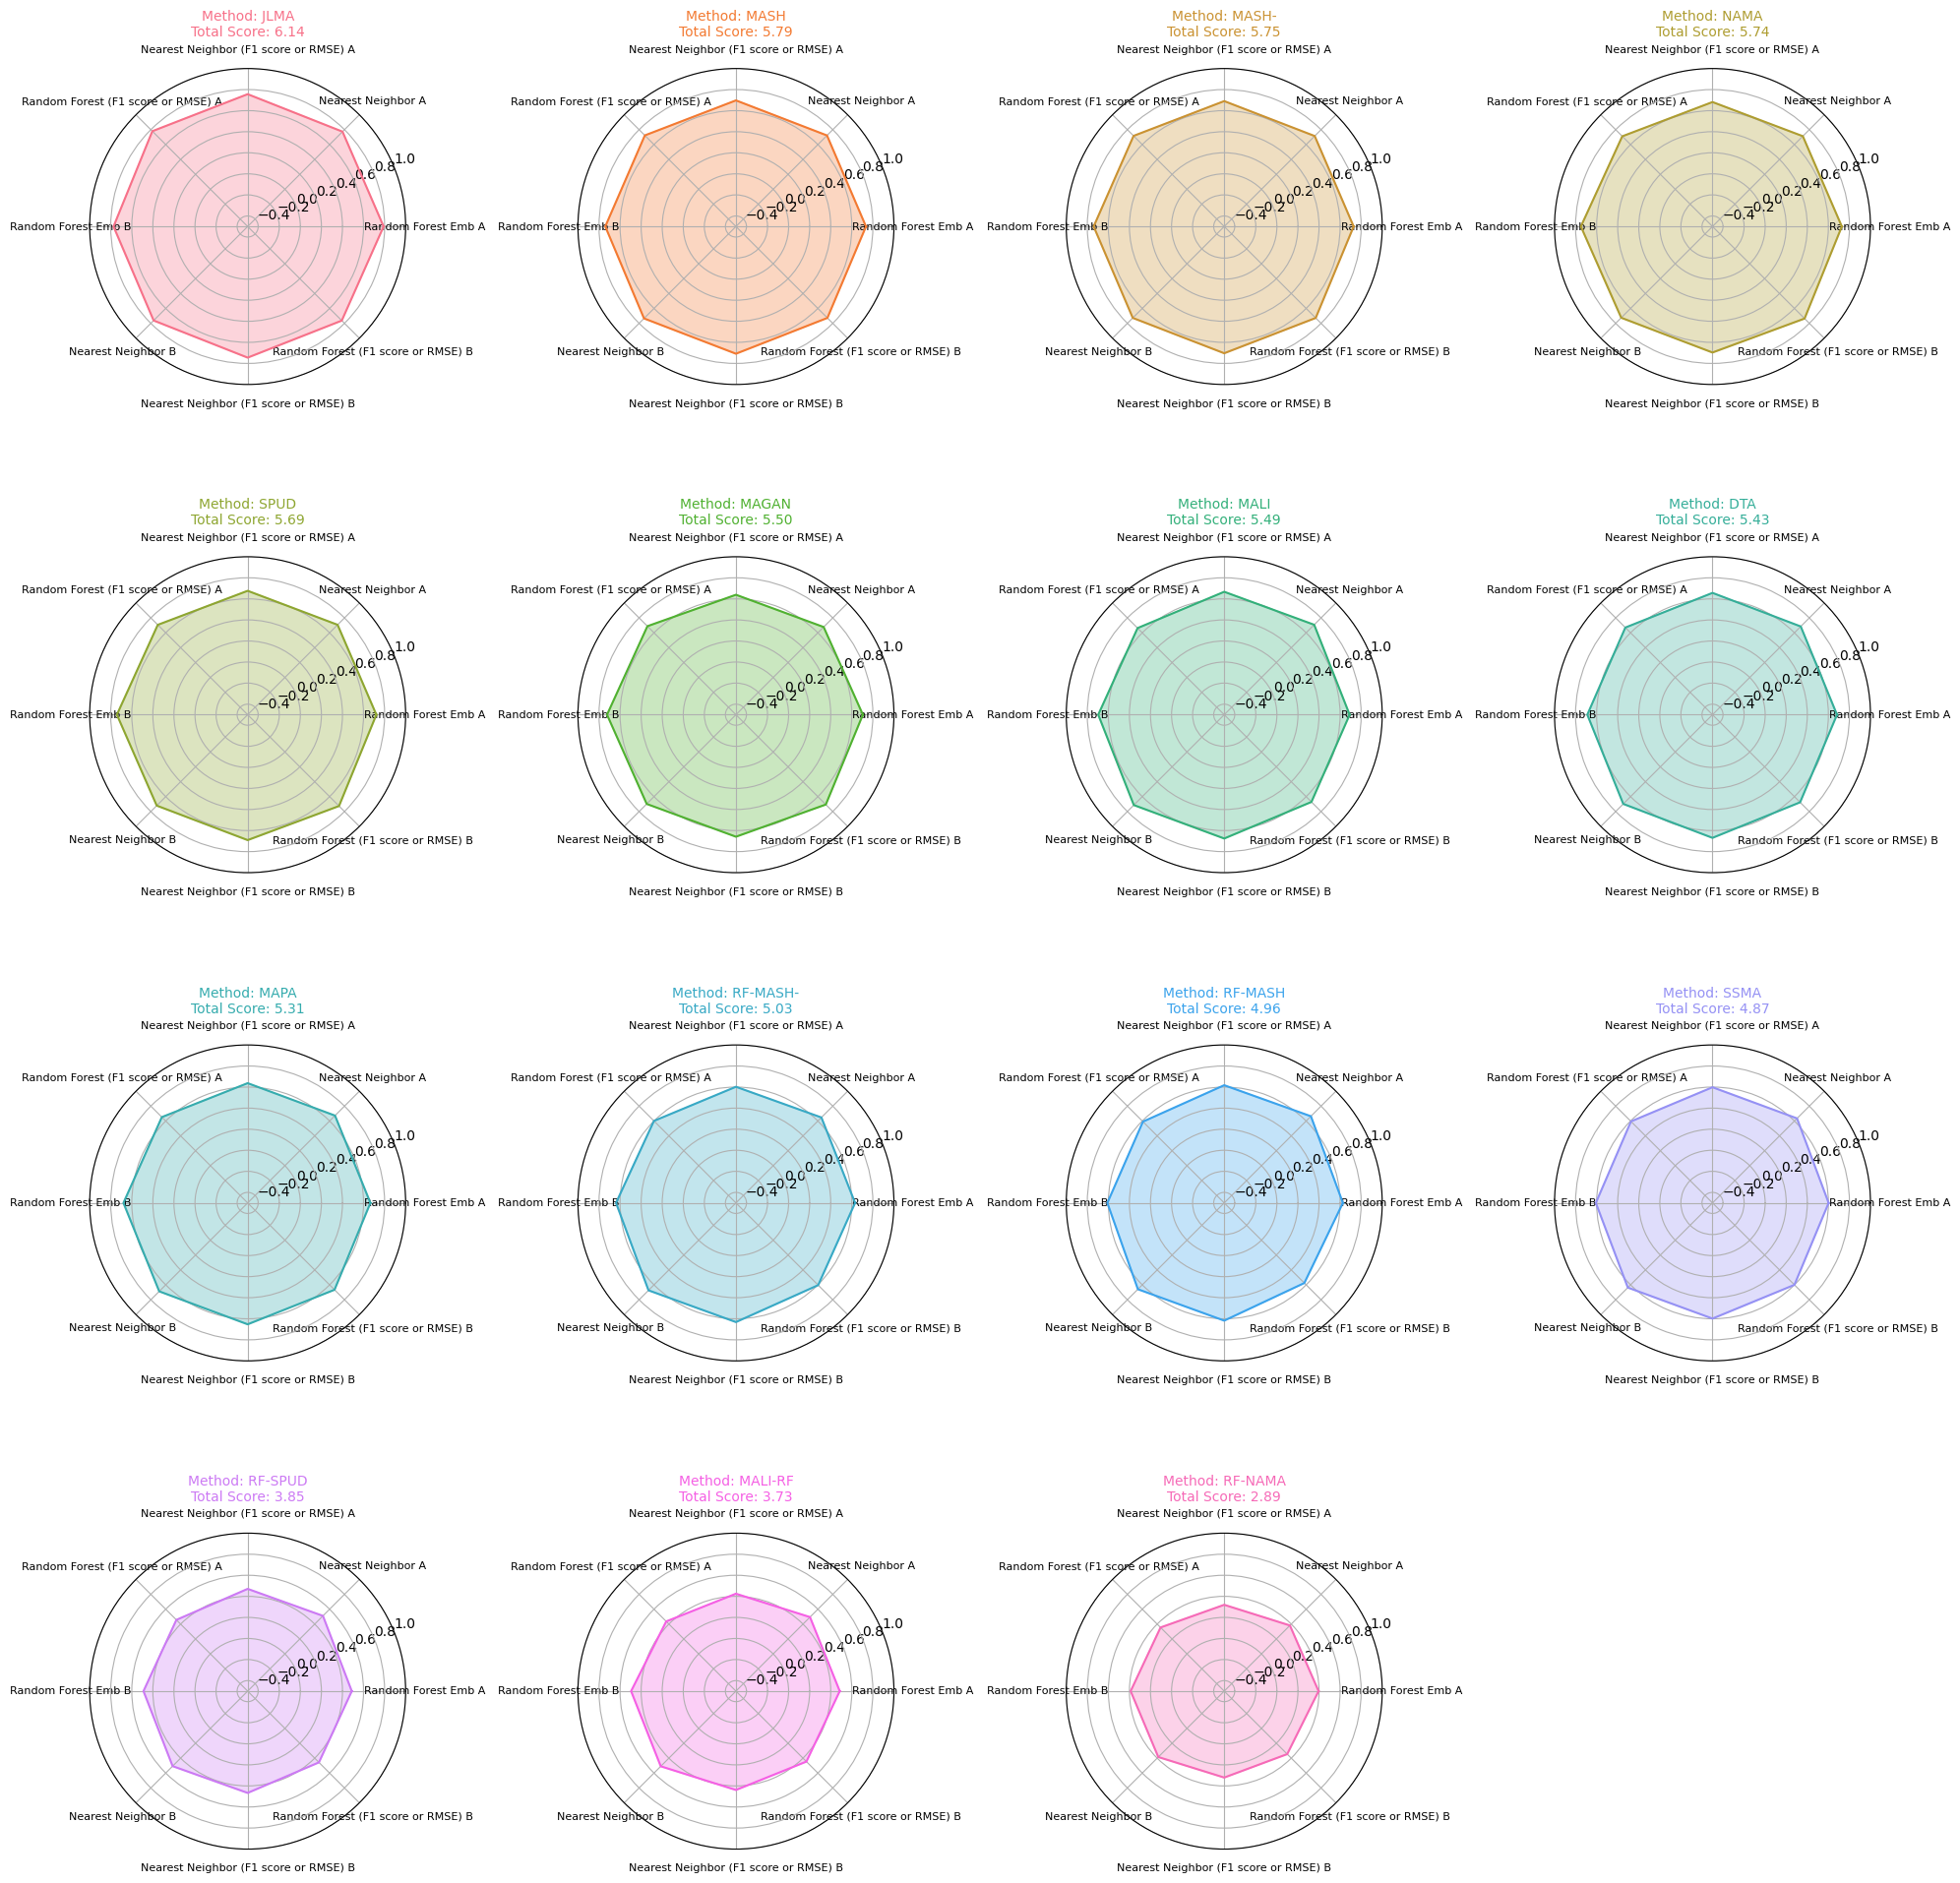

In [9]:
plot_radial(classification_df, [#'CE', 'FOSCTTM', 
                                #'Random Forest OOB', 
                                'Random Forest Emb A', 'Nearest Neighbor A', 'Nearest Neighbor (F1 score or RMSE) A', 'Random Forest (F1 score or RMSE) A',
                                'Random Forest Emb B', 'Nearest Neighbor B', 'Nearest Neighbor (F1 score or RMSE) B', 'Random Forest (F1 score or RMSE) B'])

In [10]:
# Rank each column's scores in results_df against each other
ranked_df = results_df.copy().set_index('csv_file').T
for col in ranked_df.columns:
    ranked_df[col] = ranked_df[col].rank(ascending=False)
ranked_df = ranked_df.T.reset_index()

ranked_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,9.0,15.0,2.0,11.0,8.0,7.0,6.0,13.0,14.0,1.0,4.0,NaN,16.0,12.0,10.0,5.0,3.0
1,hill_valley,4.0,15.0,3.0,13.0,6.0,7.0,1.0,11.0,14.0,2.0,17.0,8.0,16.0,12.0,5.0,9.0,10.0
2,CommunityCrime,10.0,12.0,1.0,9.0,5.0,4.0,11.0,14.0,15.0,2.0,3.0,NaN,16.0,13.0,8.0,7.0,6.0
3,heart_disease,3.0,14.0,1.0,12.0,4.5,4.5,15.0,16.0,13.0,2.0,6.0,11.0,17.0,8.0,10.0,9.0,7.0
4,Medicaldataset,5.0,11.0,4.0,NaN,7.0,6.0,9.0,NaN,NaN,3.0,NaN,8.0,13.0,12.0,1.0,10.0,2.0
5,Automobile,11.0,14.0,1.0,12.0,10.0,6.0,7.0,13.0,15.0,2.0,8.0,NaN,16.0,9.0,4.0,3.0,5.0
6,audiology,11.0,14.0,1.0,12.0,5.0,8.0,10.0,15.0,16.0,2.0,3.0,13.0,17.0,4.0,9.0,6.5,6.5
7,heart_failure,7.0,15.0,4.0,10.0,6.0,9.0,14.0,16.0,11.0,3.0,8.0,13.0,17.0,12.0,1.0,5.0,2.0
8,ConcreteSlumpTest,12.0,13.0,1.0,11.0,7.0,9.0,10.0,14.0,15.0,5.0,2.0,NaN,16.0,3.0,8.0,6.0,4.0
9,hepatitis,4.0,14.0,2.0,8.0,5.0,3.0,15.0,12.0,16.0,6.0,9.0,7.0,17.0,10.0,1.0,13.0,11.0


<Axes: >

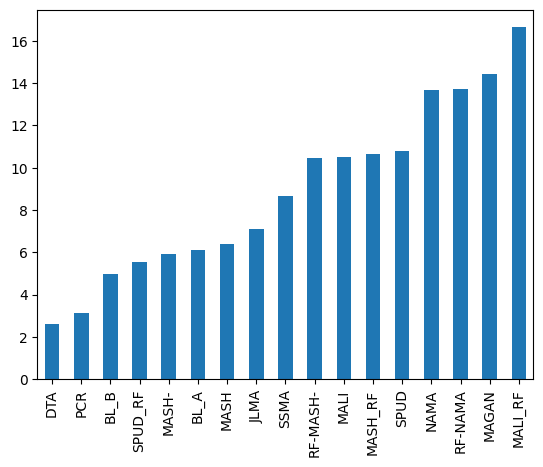

In [11]:
ranked_df.drop(columns= ["csv_file"]).mean().sort_values().plot(kind="bar")

# Helpful data frames

- Scores and their meanings
> Random Forest OOB: Is the OOB score from the RF trained against the full embedding (No training or test splits)
> Random Forest Emb A/B: The embedding is calculated with all of the points (No test or train). Then the embedding is split into a train/test. Uses data from both domains to predict points only from domain A or B using a RF algorthim (and is that score).
> Nearest Neighbor A/B: The embedding is calculated with all the points (no test or train). The embedding is then split into a train /test with equal representation from both domains. It uses all of the train data to predict on just one of the test A/B using the KNN algorithm where k = 1/30 of the dataset length. 
> NN (f1 score or RMSE): Depending on data set type, (regression or classification) its either the f1 score or RMSE. These are calculated with the same model as the Nearest Neighbor model from above. 
> RF (F1 score or RMSE): Exact same as the NN one, but using the random Forest model from above.

In [12]:
# All the data
proc_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
3378,JLMA,CommunityCrime,turn,0.3,0.740484,0.000065,0.683720,0.629385,0.628607,0.593425,0.593451,0.633751,0.633773,0.604513,0.605448,"{'42': {'RF-OOB': 0.6884922040070585, 'KNN_A':...",0.740419,0.557896,0.557896
6630,MASH,ConcreteCompressiveStrength,turn,0.3,0.602605,0.000049,0.589094,0.412526,0.429483,0.377523,0.376561,0.773773,0.774488,0.750998,0.740473,"{'42': {'RF-OOB': 0.5273601112134261, 'KNN_A':...",0.602556,0.795914,0.809655
11190,SPUD,balance_scale,distort,0.3,0.608640,0.000000,0.734000,0.724800,0.732800,0.750400,0.734400,0.722485,0.707094,0.699696,0.709575,"{'42': {'RF-OOB': 0.73, 'KNN_A': 0.744, 'RF_A'...",0.608640,0.856000,0.856000
1147,MAPA,ConcreteCompressiveStrength,random,0.3,-0.240208,0.206413,-0.016750,-0.041119,0.060972,0.033232,0.093241,0.979743,0.948662,1.016988,0.961918,"{'42': {'RF-OOB': 0.2610092933677174, 'KNN_A':...",-0.446621,0.421444,0.526074
9269,RF-SPUD,parkinsons,turn,0.3,0.927179,0.004197,0.939744,0.400000,0.415385,0.379487,0.400000,0.325855,0.349128,0.380675,0.395981,"{'42': {'RF-OOB': 0.9519230769230769, 'KNN_A':...",0.922982,0.923077,0.923077


In [13]:
classification_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
3320,SPUD,ecoli_5,even,0.3,0.651376,0.000150,0.718391,0.787879,0.681818,0.833333,0.696970,0.810683,0.654295,0.785881,0.656028,"{'42': {'RF-OOB': 0.6781609195402298, 'KNN_A':...",0.651227,0.803030,0.530303
11806,SPUD,segmentation,turn,0.3,0.440758,0.000000,0.796429,0.767442,0.767442,0.716279,0.720930,0.702923,0.700700,0.767840,0.771583,"{'42': {'RF-OOB': 0.7946428571428571, 'KNN_A':...",0.440758,0.767442,0.767442
4996,SPUD,balance_scale,skewed,0.3,0.564800,0.019200,0.737000,0.632000,0.704000,0.648000,0.720000,0.615922,0.686444,0.615431,0.674925,"{'42': {'RF-OOB': 0.674, 'KNN_A': 0.688, 'RF_A...",0.545600,0.600000,0.632000
5480,MALI,iris,distort,0.3,0.942667,0.096791,0.929167,0.946667,0.966667,0.953333,0.960000,0.953222,0.959924,0.946974,0.967129,"{'42': {'RF-OOB': 0.925, 'KNN_A': 1.0, 'RF_A':...",0.845876,1.000000,0.966667
9365,MASH,parkinsons,random,0.3,0.706667,0.164063,0.767308,0.851282,0.815385,0.856410,0.830769,0.849819,0.819512,0.845111,0.810247,"{'42': {'RF-OOB': 0.7916666666666666, 'KNN_A':...",0.542604,0.948718,0.897436


In [14]:
regression_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
4076,MASH-,ComputerHardware,even,0.3,0.769768,0.195966,0.766560,0.860736,0.568753,0.653020,0.639105,0.826364,0.842770,0.523526,0.921260,"{'42': {'RF-OOB': 0.621513469934201, 'KNN_A': ...",0.573802,0.656168,0.259228
5235,NAMA,ConcreteSlumpTest,skewed,0.3,0.123935,0.000000,0.388187,0.426766,0.644756,0.404469,0.739620,0.700321,0.463073,0.687086,0.540890,"{'42': {'RF-OOB': 0.13662218446189678, 'KNN_A'...",0.123935,-0.285050,0.787489
7641,DTA,EnergyEfficiency,skewed,0.3,0.810609,0.353336,0.851745,0.862937,0.854520,0.784129,0.855357,0.483689,0.395929,0.385414,0.397073,"{'42': {'RF-OOB': 0.8536764180845582, 'KNN_A':...",0.457273,0.867859,0.970072
253,RF-MASH-,Automobile,even,0.3,0.898628,0.107788,0.922014,0.650853,0.754080,0.661542,0.674333,0.417521,0.409555,0.424062,0.355895,"{'42': {'RF-OOB': 0.9053258362205808, 'KNN_A':...",0.790840,0.642217,0.542168
12514,MASH-,CommunityCrime,skewed,0.3,0.572881,0.024075,0.556787,0.587084,0.594294,0.570106,0.600184,0.615888,0.593951,0.603603,0.598310,"{'42': {'RF-OOB': 0.5640355276359261, 'KNN_A':...",0.548806,0.535709,0.639682
